In [4]:
import pandas as pd
import numpy as np
import re
import os
from difflib import SequenceMatcher
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [5]:
info = pd.read_csv('../data/sorted_new.csv', index_col=0)
results = pd.read_csv('../data/sorted_new_goemotion_predictions.csv', index_col=0)

In [6]:
column = pd.DataFrame({'role': info['ParticipantRole']})

In [7]:
column = column.reset_index(drop= True)

In [8]:
final = column.join(results)

In [9]:
final

,role,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,Visitor,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.981902
1,Visitor,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.998637
2,Agent,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.953519,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,Agent,0.000000,0.0,0.0,0.0,0.000000,0.0,0.318040,0.405695,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.366795
4,Visitor,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.998637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153985,Agent,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.998641
153986,Agent,0.000000,0.0,0.0,0.0,0.000000,0.0,0.528134,0.366136,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
153987,Visitor,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.933803,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481151
153988,Agent,0.905074,0.0,0.0,0.0,0.590937,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [11]:
buyer = final[final['role'] == 'Visitor']

In [12]:
volunteer = final[final['role'] == 'Agent']

In [13]:
buyer = buyer.drop(columns = ['role'])
volunteer = volunteer.drop(columns = ['role'])
buyer = buyer.reset_index(drop= True)
volunteer= volunteer.reset_index(drop= True)

In [15]:
def set_frequency(row) -> int:
    if row > 0:
        return 1
    else:
        return 0

In [16]:
frequencies_buyer = []
for column in buyer.columns:
    frequencies_buyer.append(sum(buyer[column].apply(lambda x: set_frequency(x))))

In [17]:
frequencies_buyer

[3121,
 2149,
 1288,
 1554,
 4142,
 1213,
 1709,
 15714,
 1091,
 536,
 1731,
 156,
 47,
 1082,
 154,
 1654,
 2,
 788,
 1446,
 41,
 1051,
 14,
 593,
 79,
 1042,
 549,
 651,
 60624]

In [19]:
freq_dict_buy = dict(zip(buyer.columns, frequencies_buyer))
sorted_freq_dict_buy = dict(sorted(freq_dict_buy.items(), key=lambda item: item[1]))

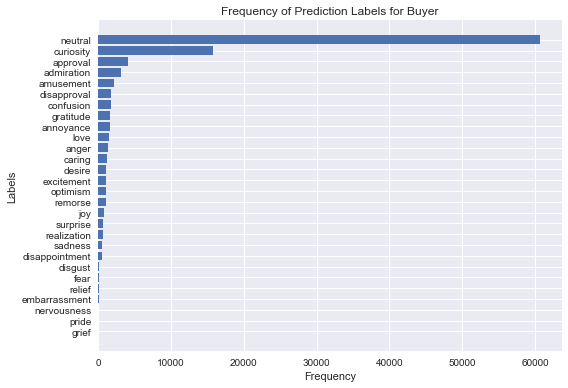

In [20]:
plt.barh(list(sorted_freq_dict_buy.keys()), list(sorted_freq_dict_buy.values()))
plt.title('Frequency of Prediction Labels for Buyer')
plt.xlabel('Frequency')
plt.ylabel('Labels')
plt.tight_layout()
plt.savefig('../graphs/buyer_freq_preds.jpg')

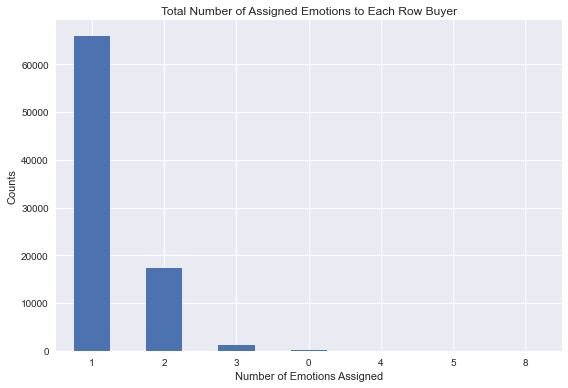

In [22]:
buyer.astype(bool).sum(axis=1).value_counts().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=360)
plt.title('Total Number of Assigned Emotions to Each Row Buyer')
plt.xlabel('Number of Emotions Assigned')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('../graphs/buyer_total_preds.jpg')

In [23]:
labels = buyer.columns
mean_scores_buyer = []
for label in labels:
    mean_scores_buyer.append(buyer.loc[buyer[label] > 0, label].mean())

In [24]:
mean_scores_buyer

[0.8405551946495482,
 0.9109931423837165,
 0.8465495459874224,
 0.7370031601251936,
 0.7013764680727043,
 0.7537864803383395,
 0.7034181489311093,
 0.7838249011388395,
 0.7276912892662419,
 0.6409393274294797,
 0.8021527817661125,
 0.686290541329445,
 0.7450897110269424,
 0.6449701462677798,
 0.7988386939872395,
 0.9350609922423472,
 0.39634984731674194,
 0.7052413639305207,
 0.802161319086001,
 0.7074356885944925,
 0.744074217684489,
 0.3970291295221874,
 0.711014609614271,
 0.5070479387723947,
 0.8170689158785137,
 0.712891117959726,
 0.7341432603914434,
 0.9245694205032179]

In [26]:
# Sorting the frequencies in increasing order
mean_dict_buyer = dict(zip(labels, mean_scores_buyer))
#del mean_dict['grief']
sorted_mean_dict_buyer = dict(sorted(mean_dict_buyer.items(), key=lambda item: item[1]))

In [37]:
sorted_mean_dict_buyer

{'grief': 0.39634984731674194,
 'pride': 0.3970291295221874,
 'relief': 0.5070479387723947,
 'disappointment': 0.6409393274294797,
 'excitement': 0.6449701462677798,
 'disgust': 0.686290541329445,
 'approval': 0.7013764680727043,
 'confusion': 0.7034181489311093,
 'joy': 0.7052413639305207,
 'nervousness': 0.7074356885944925,
 'realization': 0.711014609614271,
 'sadness': 0.712891117959726,
 'desire': 0.7276912892662419,
 'surprise': 0.7341432603914434,
 'annoyance': 0.7370031601251936,
 'optimism': 0.744074217684489,
 'embarrassment': 0.7450897110269424,
 'caring': 0.7537864803383395,
 'curiosity': 0.7838249011388395,
 'fear': 0.7988386939872395,
 'disapproval': 0.8021527817661125,
 'love': 0.802161319086001,
 'remorse': 0.8170689158785137,
 'admiration': 0.8405551946495482,
 'anger': 0.8465495459874224,
 'amusement': 0.9109931423837165,
 'neutral': 0.9245694205032179,
 'gratitude': 0.9350609922423472}

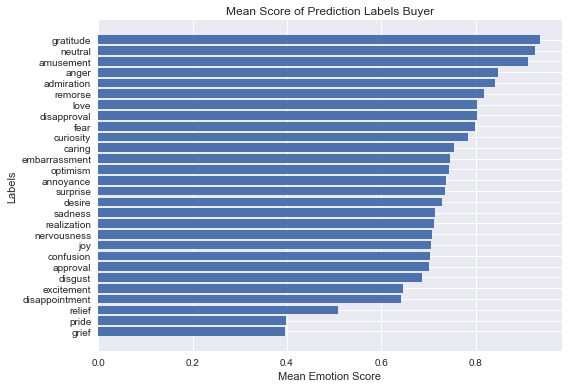

In [38]:
plt.barh(list(sorted_mean_dict_buyer.keys()), list(sorted_mean_dict_buyer.values()))
plt.title('Mean Score of Prediction Labels Buyer')
plt.xlabel('Mean Emotion Score')
plt.ylabel('Labels')
plt.tight_layout()
plt.savefig('../graphs/buyer_mean_preds.jpg')

In [39]:
frequencies_volunteer = []
for column in volunteer.columns:
    frequencies_volunteer.append(sum(volunteer[column].apply(lambda x: set_frequency(x))))

In [40]:
frequencies_volunteer

[2094,
 818,
 2231,
 784,
 3356,
 4054,
 2513,
 18114,
 275,
 442,
 1544,
 101,
 29,
 545,
 270,
 978,
 0,
 615,
 535,
 28,
 1154,
 16,
 494,
 31,
 1082,
 759,
 319,
 45803]

In [41]:
freq_dict_volunteer = dict(zip(volunteer.columns, frequencies_volunteer))
sorted_freq_dict_volunteer = dict(sorted(freq_dict_volunteer.items(), key=lambda item: item[1]))

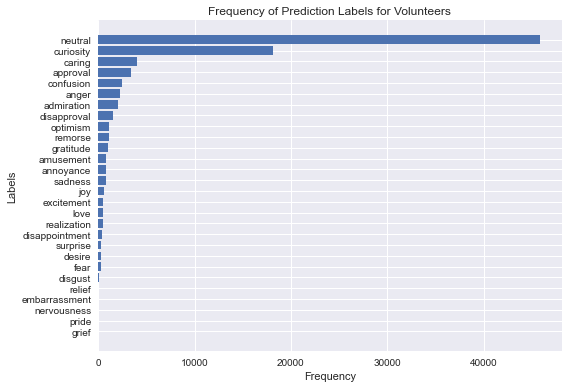

In [42]:
plt.barh(list(sorted_freq_dict_volunteer.keys()), list(sorted_freq_dict_volunteer.values()))
plt.title('Frequency of Prediction Labels for Volunteers')
plt.xlabel('Frequency')
plt.ylabel('Labels')
plt.tight_layout()
plt.savefig('../graphs/volunteer_freq_preds.jpg')

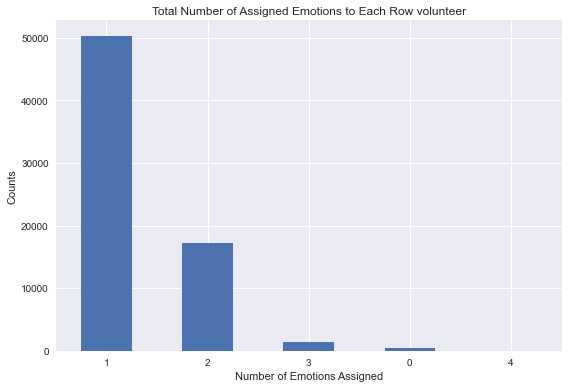

In [43]:
volunteer.astype(bool).sum(axis=1).value_counts().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=360)
plt.title('Total Number of Assigned Emotions to Each Row volunteer')
plt.xlabel('Number of Emotions Assigned')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('../graphs/volunteer_total_preds.jpg')

In [44]:
labels = volunteer.columns
mean_scores_volunteer = []
for label in labels:
    mean_scores_volunteer.append(volunteer.loc[volunteer[label] > 0, label].mean())

In [45]:
mean_scores_volunteer

[0.8330469193379995,
 0.874408507879031,
 0.669555651652658,
 0.6775242376464362,
 0.746370284879165,
 0.6920038450437634,
 0.5944464362289058,
 0.8000475085866205,
 0.6896443549069491,
 0.6635243833334737,
 0.7650730202235089,
 0.7044460941659342,
 0.6919222124691667,
 0.6278856016080314,
 0.7920469767517514,
 0.9223520946222337,
 nan,
 0.7052495177683792,
 0.8271335267017935,
 0.6225167300019946,
 0.7565028110657862,
 0.5828719735145569,
 0.6072920066142372,
 0.49125076109363186,
 0.789367324350722,
 0.6861940660417002,
 0.7331153271153429,
 0.8977900768007989]

In [46]:
# Sorting the frequencies in increasing order
mean_dict_volunteer = dict(zip(labels, mean_scores_volunteer))
del mean_dict_volunteer['grief']
sorted_mean_dict_volunteer = dict(sorted(mean_dict_volunteer.items(), key=lambda item: item[1]))

In [47]:
sorted_mean_dict_volunteer

{'relief': 0.49125076109363186,
 'pride': 0.5828719735145569,
 'confusion': 0.5944464362289058,
 'realization': 0.6072920066142372,
 'nervousness': 0.6225167300019946,
 'excitement': 0.6278856016080314,
 'disappointment': 0.6635243833334737,
 'anger': 0.669555651652658,
 'annoyance': 0.6775242376464362,
 'sadness': 0.6861940660417002,
 'desire': 0.6896443549069491,
 'embarrassment': 0.6919222124691667,
 'caring': 0.6920038450437634,
 'disgust': 0.7044460941659342,
 'joy': 0.7052495177683792,
 'surprise': 0.7331153271153429,
 'approval': 0.746370284879165,
 'optimism': 0.7565028110657862,
 'disapproval': 0.7650730202235089,
 'remorse': 0.789367324350722,
 'fear': 0.7920469767517514,
 'curiosity': 0.8000475085866205,
 'love': 0.8271335267017935,
 'admiration': 0.8330469193379995,
 'amusement': 0.874408507879031,
 'neutral': 0.8977900768007989,
 'gratitude': 0.9223520946222337}

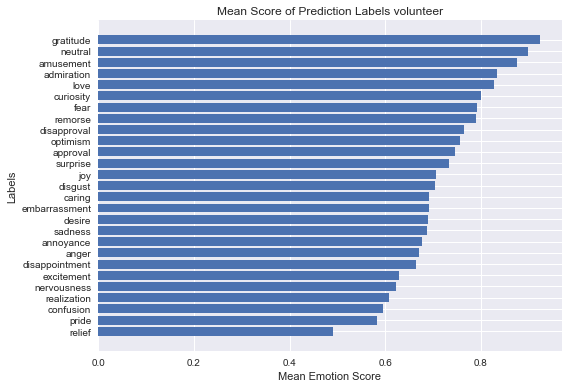

In [48]:
plt.barh(list(sorted_mean_dict_volunteer.keys()), list(sorted_mean_dict_volunteer.values()))
plt.title('Mean Score of Prediction Labels volunteer')
plt.xlabel('Mean Emotion Score')
plt.ylabel('Labels')
plt.tight_layout()
plt.savefig('../graphs/volunteer_mean_preds.jpg')